In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import seaborn as sns

In [3]:
mcMatrix = pd.read_csv("mcMatrix.csv", index_col=False)

In [4]:
mcMatrix = mcMatrix.values[:, 1:]

In [5]:
mcMatrix.shape

(20, 10000)

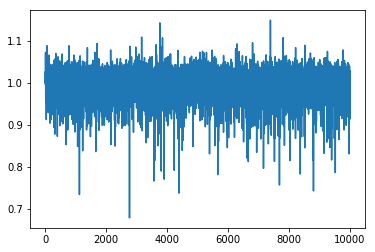

In [7]:
plt.plot(mcMatrix[0])

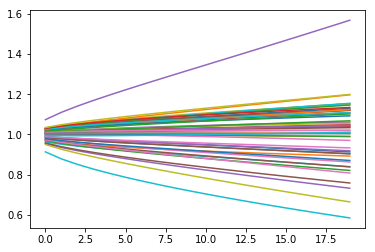

In [8]:
plt.plot(mcMatrix[:, :50]);

In [9]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.size"] = 14

In [10]:
ls data/real_vol_surfaces/

spxVols20130814.csv  spxVols20170519.csv


In [11]:
# data from the article

x_ , y_ =( 
[np.array([[0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ]]),
 np.array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
        [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
        [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
        [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
        [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
        [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
        [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
        [1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3],
        [1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4],
        [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]])])

In [12]:
DATE_YYYYMMDD = 20130814
DATE_YYYYMMDD_SECOND = 20170519

DATE_FMT = "%Y%m%d"


def to_numpy_date(x):
    if isinstance(x, int):
        return np.datetime64(pd.to_datetime(x, format=DATE_FMT))
    else:
        return np.array([np.datetime64(pd.to_datetime(y, format=DATE_FMT)) for y in x])


INIT_DATE = to_numpy_date(DATE_YYYYMMDD)

In [13]:
ls

1Factor/                           InverseMap/                   README.md
capstone_latex/                    mcMatrix.csv                  RoughBergomi/
data/                              PlotVolSurface3D_Draft.ipynb  utils/
generating_grid_mat_strikes.ipynb  __pycache__/                  utils.py
images_and_other/                  r_code_for_sym/               varSwap/


In [14]:
df1 = pd.read_csv(f"data/real_vol_surfaces/spxVols{DATE_YYYYMMDD}.csv")
df2 = pd.read_csv(f"data/real_vol_surfaces/spxVols{DATE_YYYYMMDD_SECOND}.csv")

df1["ratio"] = df1.Strike / df1.Fwd
df2["ratio"] = df2.Strike / df2.Fwd


# df = pd.concat([df1, df2])

# df.drop(columns=["Unnamed: 0"], inplace=True)

In [15]:
unique_texp = np.unique(np.log(df2.Texp))

mat_idces = [0, 2, 5, 11, 20, 26, 32, 34]
assert len(mat_idces) == 8

maturities = np.exp(unique_texp[mat_idces])

strikes = np.linspace(-1, 0.4, 11)

xx, yy = np.meshgrid(maturities, strikes)

yy = np.exp(yy * np.sqrt(xx))

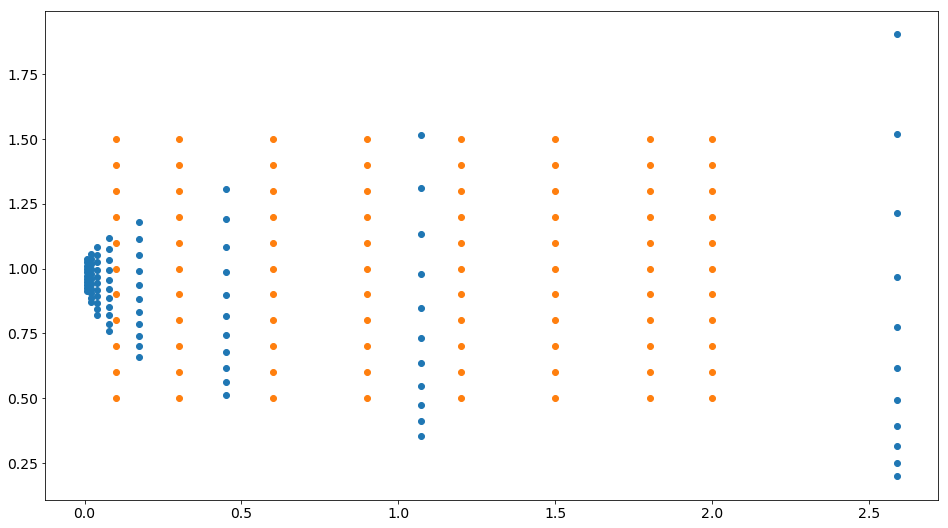

In [16]:
plt.scatter(xx, yy)
plt.scatter(x_, y_)

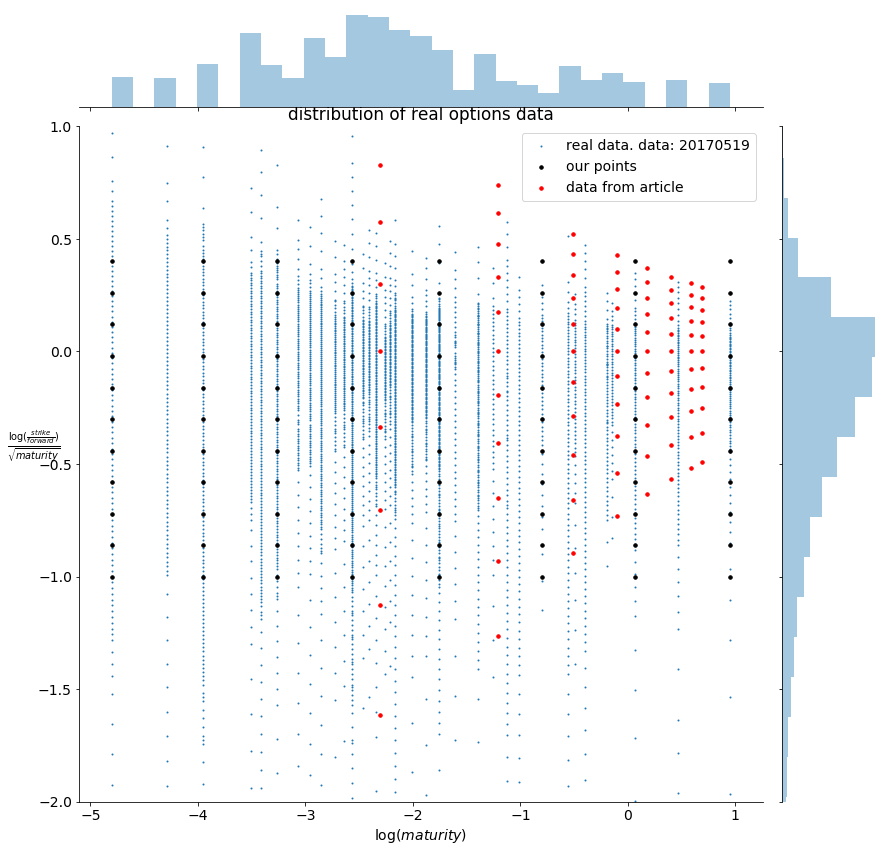

In [17]:
# fig, axis = plt.subplots(1, 1)

obj = sns.jointplot(np.log(df2.Texp), np.log(df2.ratio) / np.sqrt(df2.Texp),
            height=12, ratio=6,
             s=1, label=f"real data. data: {DATE_YYYYMMDD_SECOND}")


axis = obj.ax_joint
axis.set_title("distribution of real options data")

points_size = 12
axis.scatter(np.log(xx), np.log(yy) / np.sqrt(xx),
             c="k", s=points_size, label="our points")

axis.scatter(np.log(x_), np.log(y_) / np.sqrt(x_),
            label="data from article", c='r', s=points_size)

axis.set_ylabel(r"$\frac{\log{(\frac{strike}{forward})}}{\sqrt{maturity}}$", rotation=0)
axis.set_xlabel(r"$\log{(maturity)}$")

axis.set_ylim(-2, 1)
axis.legend()


In [18]:
dim_m = 8  # maturities
dim_s = 11 # strikes
maturities_m = xx[0]
strikes_for_each_mat_sm = yy

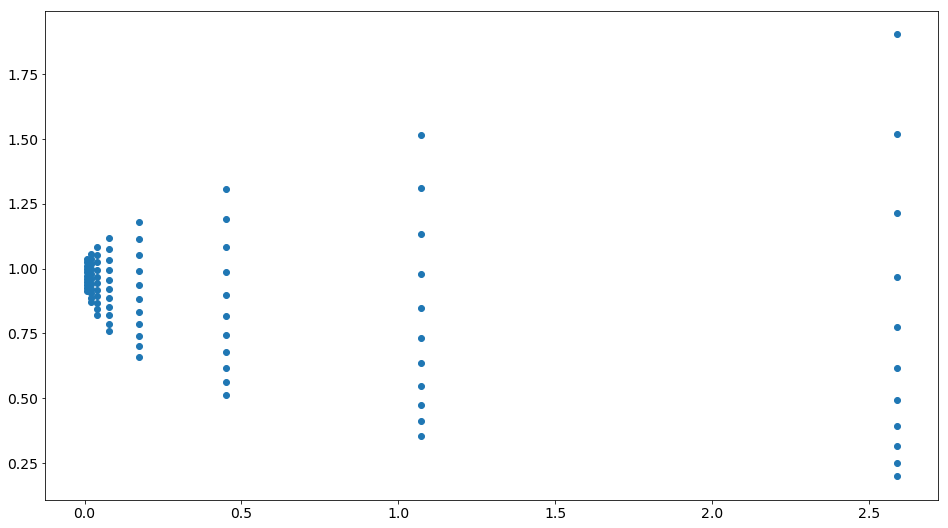

In [19]:
# sanity check
plt.scatter(np.tile(maturities_m, dim_s), strikes_for_each_mat_sm)

In [20]:
data = pd.DataFrame(strikes_for_each_mat_sm.T, index=maturities_m)

In [21]:
data.index.name = "maturities"

In [23]:
data.to_csv("r_code_for_sym/maturity_strike_grid.csv")

In [22]:
data.to_csv("data/mat_strike_grid.csv")

In [6]:
pd.read_csv("data/mat_str_grid.csv", index_col="maturities")

,0,1,2,3,4,5,6,7,8,9,10
maturities,,,,,,,,,,,
0.008214,0.913357,0.925019,0.936831,0.948793,0.960908,0.973178,0.985604,0.998189,1.010935,1.023843,1.036917
0.019165,0.870718,0.887758,0.905132,0.922845,0.940906,0.959319,0.978094,0.997235,1.016751,1.036649,1.056937
0.038330,0.822193,0.845040,0.868522,0.892657,0.917463,0.942957,0.969161,0.996092,1.023772,1.052221,1.081460
0.076660,0.758149,0.788114,0.819263,0.851643,0.885303,0.920294,0.956667,0.994478,1.033783,1.074642,1.117116
0.172485,0.660134,0.699654,0.741541,0.785935,0.832987,0.882855,0.935710,0.991728,1.051100,1.114027,1.180721
0.451745,0.510625,0.561006,0.616359,0.677172,0.743986,0.817392,0.898041,0.986648,1.083996,1.190950,1.308456
1.073238,0.354881,0.410272,0.474307,0.548338,0.633923,0.732867,0.847253,0.979494,1.132374,1.309117,1.513445
2.587269,0.200188,0.250747,0.314076,0.393400,0.492757,0.617208,0.773090,0.968342,1.212907,1.519239,1.902939
